<a href="https://colab.research.google.com/github/mwithgod3952/jh_Minor_Projects/blob/main/model_for_product_recommendation%20with%20cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [2]:
import os
from tqdm import tqdm
import time

from keras.applications import vgg16
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

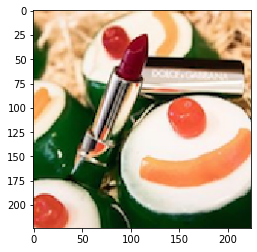

In [3]:
# Test img show
imgs_dir = "/content/drive/MyDrive/style"
imgs_model_width, imgs_model_height = 224, 224
nb_closest_images = 5 

img_path_lst = os.listdir(imgs_dir)
img          = image.load_img(os.path.join(imgs_dir, img_path_lst[50]), target_size=(imgs_model_width, imgs_model_height))

plt.imshow(img)
plt.show()

In [4]:
vgg_model = vgg16.VGG16(weights='imagenet')
feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)
feat_extractor.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [8]:
images, excepted_ind = [],[]

In [9]:
for i in tqdm(range(len(img_path_lst))):
    try:
        image_png = image.load_img(os.path.join(imgs_dir, img_path_lst[i]), target_size=(imgs_model_width, imgs_model_height))
        time.sleep(0.5)

        imgae_num = img_to_array(image_png)
        image_bat = np.expand_dims(imgae_num, axis=0)

        images.append(image_bat)
    except:
        excepted_ind.append(i)   

images        = np.vstack(images)
learned_imges = preprocess_input(images.copy())

100%|██████████| 2186/2186 [21:50<00:00,  1.67it/s]


In [12]:
print("Index of data that failed training : ", excepted_ind)

Index of data that failed training :  [999, 1233]


In [16]:
print("number of successfully trained data : ", len(images))

number of successfully trained data :  2184


In [17]:
imgs_features = feat_extractor.predict(learned_imges)

In [21]:
print("extracted features shape : " ,imgs_features.shape)

extracted features shape :  (2184, 4096)


***Cosine similarity***

In [28]:
trainded_files = sum([img_path_lst[:2183], img_path_lst[2185:4095], img_path_lst[4097:]], [])

cos_smts   = cosine_similarity(imgs_features)
df_cos_smts = pd.DataFrame(cos_smts, columns=trainded_files, index=trainded_files)
df_cos_smts.head(1)

,2_0_047.png,2_0_048.png,2_0_049.png,2_0_050.png,2_0_051.png,2_0_052.png,2_0_053.png,2_0_054.png,2_0_055.png,2_0_056.png,2_0_057.png,2_0_058.png,2_0_059.png,2_0_060.png,2_0_061.png,2_0_062.png,2_0_063.png,2_0_064.png,2_0_065.png,2_8_007.png,2_8_008.png,2_8_009.png,2_8_010.png,2_8_011.png,2_8_012.png,2_8_013.png,2_8_014.png,2_8_015.png,2_8_016.png,2_8_017.png,2_8_018.png,2_0_066.png,2_0_067.png,2_0_068.png,2_0_069.png,2_0_070.png,2_0_071.png,0_1_023.png,2_1_013.png,2_1_014.png,...,1_2_017.png,1_2_018.png,1_2_019.png,1_2_020.png,1_2_021.png,1_2_022.png,1_2_023.png,1_2_024.png,1_2_025.png,1_2_026.png,1_2_027.png,1_2_028.png,1_2_029.png,1_2_030.png,1_2_031.png,1_2_032.png,1_2_033.png,1_2_034.png,1_1_001.png,1_1_002.png,1_1_003.png,1_1_004.png,1_1_005.png,1_1_006.png,1_1_007.png,1_1_008.png,1_1_009.png,1_1_010.png,1_1_011.png,1_1_012.png,1_1_013.png,1_1_014.png,1_3_001.png,1_3_002.png,1_3_004.png,1_3_003.png,1_3_005.png,1_3_006.png,1_2_035.png,1_5_001.png
2_0_047.png,1.0,0.54964,0.554864,0.565178,0.53501,0.58935,0.727035,0.595363,0.451548,0.55015,0.438822,0.590422,0.504298,0.610506,0.557173,0.656643,0.692341,0.604755,0.605783,0.468498,0.453417,0.280828,0.403348,0.385917,0.348771,0.479584,0.423977,0.483865,0.417197,0.559939,0.443265,0.644442,0.593055,0.573918,0.582563,0.71363,0.825763,0.249178,0.176465,0.253041,...,0.249112,0.297522,0.482059,0.459725,0.339083,0.410646,0.353922,0.324531,0.417865,0.392252,0.316651,0.324859,0.380238,0.303866,0.319061,0.391559,0.202852,0.158245,0.207694,0.243264,0.240346,0.190374,0.182275,0.186343,0.140993,0.266799,0.164138,0.293003,0.1888,0.204922,0.207451,0.16832,0.141257,0.188929,0.154177,0.173418,0.236656,0.163345,0.192679,0.265102


In [31]:
# function to retrieve the most similar products for a given one

def retrieve_most_similar_products(given_img):

    print("original product :")

    original = image.load_img(os.path.join(imgs_dir, given_img), target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

    print("most similar products :")

    closest_imgs = df_cos_smts[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
    closest_imgs_scores = df_cos_smts[given_img].sort_values(ascending=False)[1:nb_closest_images+1]

    for i in range(0,len(closest_imgs)):

        original = image.load_img(os.path.join(imgs_dir, closest_imgs[i]), target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()

        print("similarity score : ",closest_imgs_scores[i])

original product :


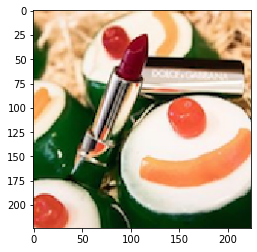

most similar products :


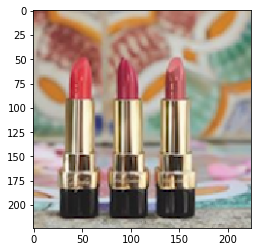

similarity score :  0.51150876


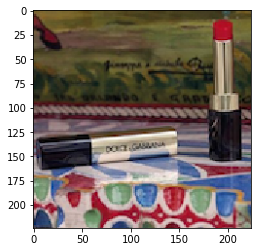

similarity score :  0.5101902


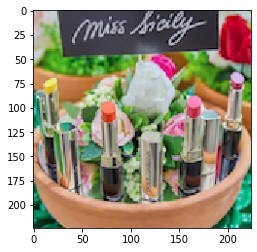

similarity score :  0.5039866


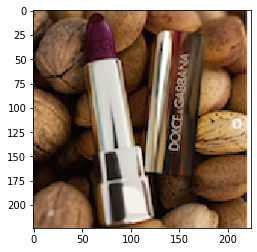

similarity score :  0.49634454


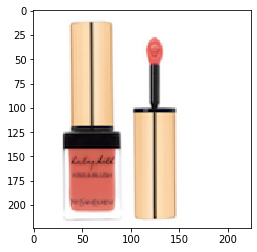

similarity score :  0.46818566


In [33]:
retrieve_most_similar_products(trainded_files[50])

original product :


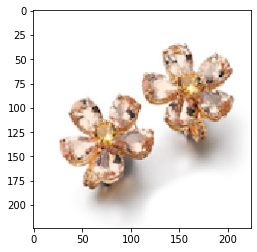

most similar products :


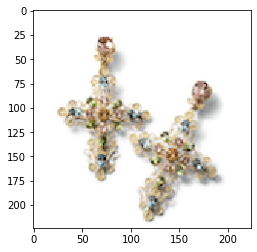

similarity score :  0.71357816


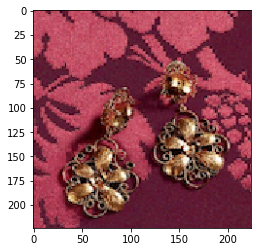

similarity score :  0.6354612


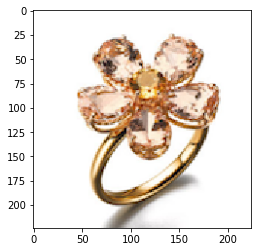

similarity score :  0.6266793


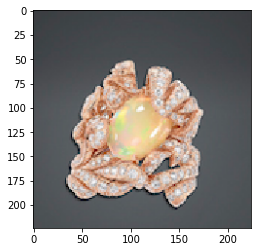

similarity score :  0.5865296


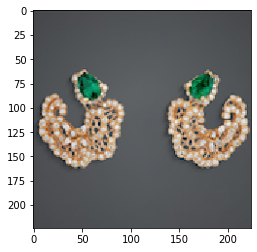

similarity score :  0.57821906


In [37]:
retrieve_most_similar_products(trainded_files[150])